<a href="https://colab.research.google.com/github/Lalit767/Expedia_Case_Study/blob/main/PlatformAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-419fdc8f473b>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_nights, x="Room Nights (M)", y="Platform", ax=axs[0, 0], palette="crest")
<ipython-input-1-419fdc8f473b>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_bounce, x="Platform", y="Bounce Rate", ax=axs[1, 0], palette="flare")
<ipython-input-1-419fdc8f473b>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_eff, x="Platform", y="Efficiency (%)", ax=axs[1, 1], palette="viridis")


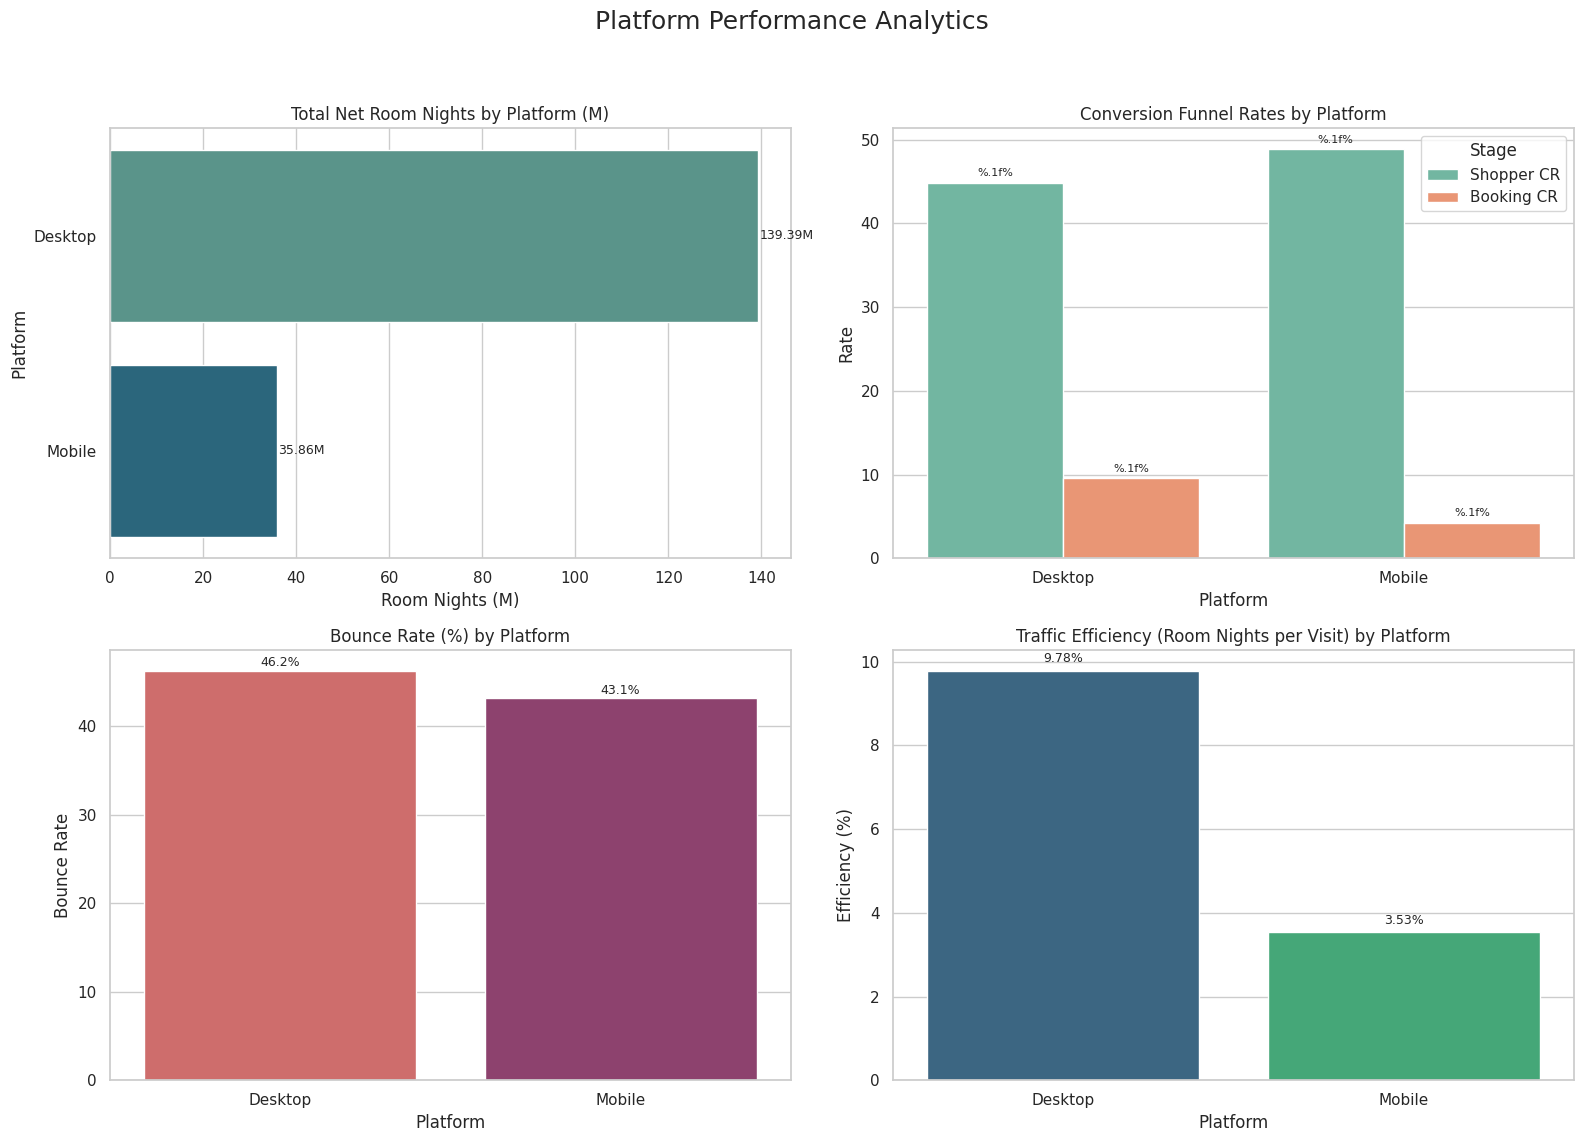


Platform Summary Table:
  Platform Traffic  Room Nights (M) Room Nights Volume  Shopper CR  \
0  Desktop    High           139.39            Highest       44.86   
1   Mobile     Low            35.86                Low       48.90   

   Booking CR  Bounce Rate  Efficiency (%)  
0        9.61        46.25            9.78  
1        4.25        43.13            3.53  


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/sample_data/HCOM_Analytics_Insights_Case_Study_Dataset.csv")

# ------- Device Usage (Platform Trends) -------
# Aggregate metrics by Platform
platform_summary = df.groupby("Platform")[[
    "Visits", "Qualified Shoppers", "Bounced Visits", "Net Orders", "Net Room Nights"
]].sum().reset_index()

# Compute metrics
platform_summary["Shopper Conversion Rate (%)"] = (
    platform_summary["Qualified Shoppers"] / platform_summary["Visits"].replace(0, 1) * 100
).round(2)

platform_summary["Booking Conversion Rate (%)"] = (
    platform_summary["Net Orders"] / platform_summary["Qualified Shoppers"].replace(0, 1) * 100
).round(2)

platform_summary["Bounce Rate (%)"] = (
    platform_summary["Bounced Visits"] / platform_summary["Visits"].replace(0, 1) * 100
).round(2)

platform_summary["Traffic Efficiency (%)"] = (
    platform_summary["Net Room Nights"] / platform_summary["Visits"].replace(0, 1) * 100
).round(2)

# Add qualitative and volume labels
platform_summary["Traffic"] = pd.qcut(platform_summary["Visits"], q=3, labels=["Low", "Medium", "High"])
platform_summary["Room Nights (M)"] = (platform_summary["Net Room Nights"] / 1e6).round(2)
platform_summary["Room Nights Volume"] = pd.qcut(platform_summary["Net Room Nights"], q=3, labels=["Low", "Moderate", "Highest"])

# Final summary table
platform_table = platform_summary[[
    "Platform", "Traffic", "Room Nights (M)", "Room Nights Volume",
    "Shopper Conversion Rate (%)", "Booking Conversion Rate (%)",
    "Bounce Rate (%)", "Traffic Efficiency (%)"
]].rename(columns={
    "Shopper Conversion Rate (%)": "Shopper CR",
    "Booking Conversion Rate (%)": "Booking CR",
    "Bounce Rate (%)": "Bounce Rate",
    "Traffic Efficiency (%)": "Efficiency (%)"
}).reset_index(drop=True)

# ----------- Plotting Platform Dashboard -----------

sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Platform Performance Analytics", fontsize=18)

# Chart 1: Total Net Room Nights (M)
sorted_nights = platform_table.sort_values("Room Nights (M)", ascending=False)
sns.barplot(data=sorted_nights, x="Room Nights (M)", y="Platform", ax=axs[0, 0], palette="crest")
axs[0, 0].set_title("Total Net Room Nights by Platform (M)")
for i, v in enumerate(sorted_nights["Room Nights (M)"]):
    axs[0, 0].text(v + 0.2, i, f'{v:.2f}M', va='center', fontsize=9)

# Chart 2: Conversion Funnel
conversion_data = platform_table.melt(
    id_vars="Platform",
    value_vars=["Shopper CR", "Booking CR"],
    var_name="Stage",
    value_name="Rate"
)
sns.barplot(data=conversion_data, x="Platform", y="Rate", hue="Stage", ax=axs[0, 1], palette="Set2")
axs[0, 1].set_title("Conversion Funnel Rates by Platform")
axs[0, 1].tick_params(axis='x', rotation=0)
for bar in axs[0, 1].containers:
    axs[0, 1].bar_label(bar, fmt="%.1f%", padding=3, fontsize=8)

# Chart 3: Bounce Rate
sorted_bounce = platform_table.sort_values("Bounce Rate", ascending=False)
sns.barplot(data=sorted_bounce, x="Platform", y="Bounce Rate", ax=axs[1, 0], palette="flare")
axs[1, 0].set_title("Bounce Rate (%) by Platform")
for i, val in enumerate(sorted_bounce["Bounce Rate"]):
    axs[1, 0].text(i, val + 0.5, f'{val:.1f}%', ha='center', fontsize=9)

# Chart 4: Traffic Efficiency
sorted_eff = platform_table.sort_values("Efficiency (%)", ascending=False)
sns.barplot(data=sorted_eff, x="Platform", y="Efficiency (%)", ax=axs[1, 1], palette="viridis")
axs[1, 1].set_title("Traffic Efficiency (Room Nights per Visit) by Platform")
for i, val in enumerate(sorted_eff["Efficiency (%)"]):
    axs[1, 1].text(i, val + 0.2, f'{val:.2f}%', ha='center', fontsize=9)

# Final layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Optional: Display summary table
print("\nPlatform Summary Table:")
print(platform_table)
